In [1]:
import pandas as pd

# 1. 导入数据集
data = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_Datacode/第二章/国家财政收支数据表.csv')

# 2. 计算平均值/中位数/众数/方差/标准差，以及25%/50%/75%分位数
mean = data.mean()
median = data.median()
mode = data.mode().iloc[0]  # 若有多个众数，取第一个
variance = data.var()
std_deviation = data.std()
quantiles = data.quantile([0.25, 0.5, 0.75])

# 打印结果
print("平均值:", mean)
print("中位数:", median)
print("众数:", mode)
print("方差:", variance)
print("标准差:", std_deviation)
print("分位数:\n", quantiles)


平均值: 年度标识     1985.500000
财政收入    31415.137361
财政支出    36258.646528
收支差额    -4843.509167
dtype: float64
中位数: 年度标识    1985.500
财政收入    2063.415
财政支出    2104.580
收支差额     -70.145
dtype: float64
众数: 年度标识     1950.00
财政收入       62.17
财政支出       68.05
收支差额   -62765.15
Name: 0, dtype: float64
方差: 年度标识    4.380000e+02
财政收入    3.319369e+09
财政支出    4.733139e+09
收支差额    1.501852e+08
dtype: float64
标准差: 年度标识       20.928450
财政收入    57613.962490
财政支出    68797.812012
收支差额    12255.005575
dtype: float64
分位数:
          年度标识        财政收入       财政支出       收支差额
0.25  1967.75    550.7225    541.790 -2138.0625
0.50  1985.50   2063.4150   2104.580   -70.1450
0.75  2003.25  22885.5550  25609.185     0.7475


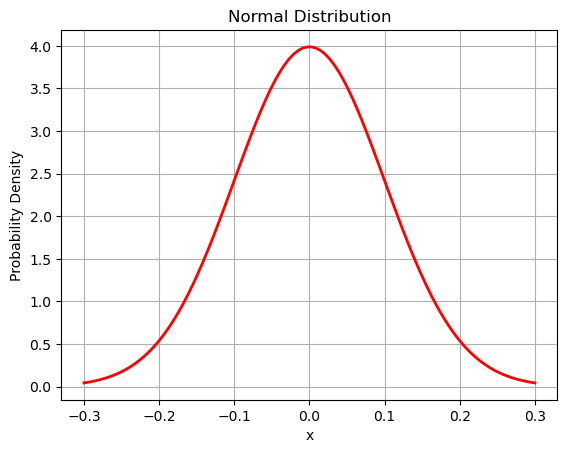

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一组随机数据
mu, sigma = 0, 0.1 # 均值和标准差
data = np.random.normal(mu, sigma, 1000)

# 绘制正态分布曲线
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

plt.plot(x, y, linewidth=2, color='r')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.grid(True)
plt.show()



In [3]:
#导入相关的模块
import pandas as pd
import matplotlib.pyplot as plt
#读取数据集-科技etf-517360.ss的日价格数据
df = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第二章/517360.SS.csv') 
# 设置时间格式
df['Date'] = pd.to_datetime(df['Date'])
#通过收盘价格计算日收益率
df['Return'] = df['Close'].pct_change()
# 显示数据观察收益率变量是否计算并添加成功
df.head()




/var/folders/cl/wbfw5l6x06qggs_8v4x0__th0000gn/T/ipykernel_4984/2239381702.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df['Return'] = df['Close'].pct_change()


,Date,Open,High,Low,Close,Volume,Return
0,2021-10-25,0.929,0.933,0.924,0.933,1805800.0,NaN
1,2021-10-26,0.933,0.942,0.930,0.930,1639300.0,-0.003215
2,2021-10-27,0.930,0.930,0.916,0.917,2078800.0,-0.013978
3,2021-10-28,0.920,0.920,0.909,0.911,2102200.0,-0.006543
4,2021-10-29,0.911,0.915,0.906,0.915,2404700.0,0.004391


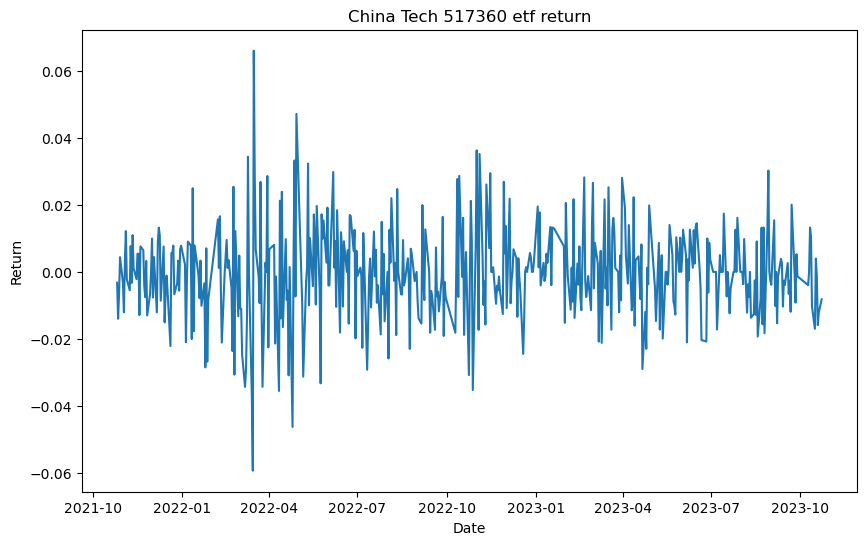

In [4]:
# 绘制收益率曲线
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Return'])
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('China Tech 517360 etf return')
plt.show()

/var/folders/cl/wbfw5l6x06qggs_8v4x0__th0000gn/T/ipykernel_4984/7515003.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df['Return'] = df['Close'].pct_change()


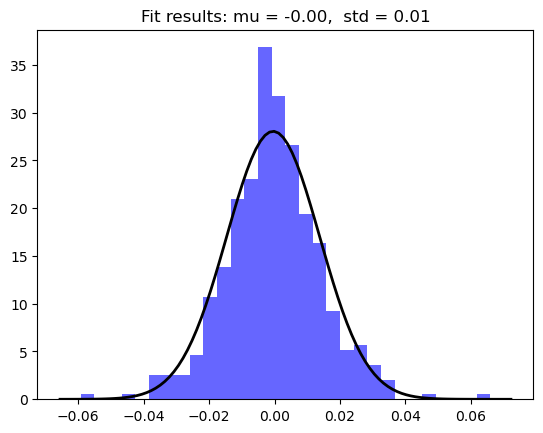

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 导入数据
df = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第二章/517360.SS.csv')  
df['Date'] = pd.to_datetime(df['Date'])
# 计算收益率
df['Return'] = df['Close'].pct_change()
# 去除NaN值
df = df.dropna()
# 4. 计算收益率的均值和标准差
mu, std = norm.fit(df['Return'])
# 5. 绘制收益率的直方图
plt.hist(df['Return'], bins=30, density=True, alpha=0.6, color='b')
# 6. 绘制正态分布的概率密度函数
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
# 7. 显示图例和标题
plt.title(title)
plt.show()


In [6]:
from scipy import stats

# 计算偏度
skewness = stats.skew(df['Return'].dropna())
print(f"偏度：{skewness}")

# 计算峰度
kurtosis = stats.kurtosis(df['Return'].dropna())
print(f"峰度：{kurtosis}")



偏度：0.10072706677671371
峰度：1.5705122969353926


/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


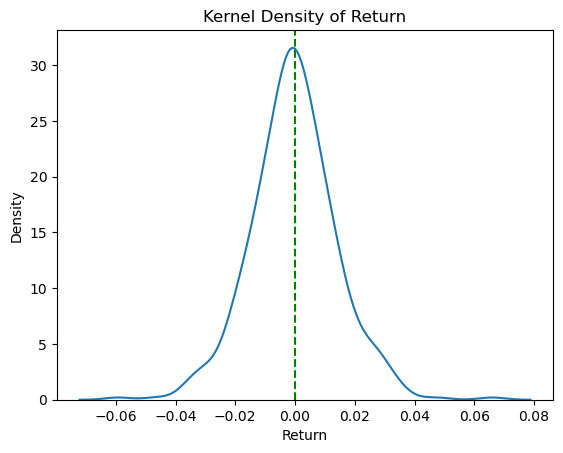

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 画出Kernel Density
sns.kdeplot(df['Return'].dropna(), bw_method=0.3)

# 添加0均值的虚线
plt.axvline(0, color='g', linestyle='--')

plt.title('Kernel Density of Return')
plt.show()


In [8]:
import pandas as pd

#根据路径读取csv文件
files = ["688387.SS", "601618.SS", "688981.SS", "002855.SZ", "300114.SZ","300308.SZ"]
path = "/Users/xiaoquanliu/Desktop/Book_DataCode/第二章/"
dataframes = {}

for file in files:
    data = pd.read_csv(path + file + '.csv')
    data['Return'] = data['Close'].pct_change()
    data = data[['Date', 'Return']]
    data.columns = ['Date', file + 'Return']
    dataframes[file] = data

#合并日收益率
merged_return = pd.DataFrame()
for df in dataframes.values():
    if merged_return.empty:
        merged_return = df
    else:
        merged_return = pd.merge(merged_return, df, on='Date')

#保存合并的收益率csv文档到指定路径
merged_return.to_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第二章/merged_return.csv', index=False)



                 Skewness  Kurtosis
688387.SSReturn  2.027722  9.170892
601618.SSReturn  0.165731  1.956205
688981.SSReturn  0.101679  4.015299
002855.SZReturn  0.671360  1.363225
300114.SZReturn  2.218491  6.405971
300308.SZReturn  1.134187  2.801581


/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

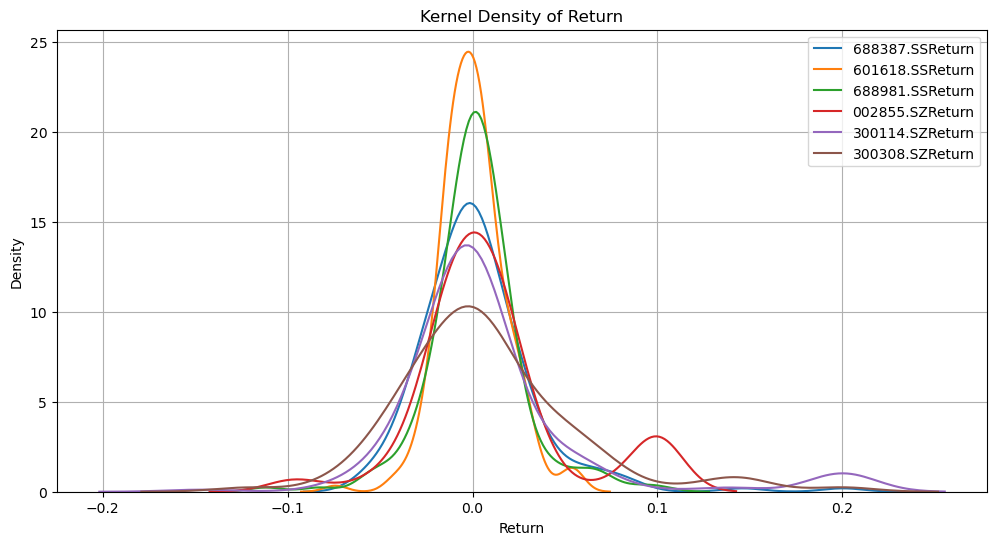

In [9]:
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
df = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第二章/merged_return.csv')

# 计算每个个股return的峰度和偏度
stats = {}
for column in df.columns:
    if column != 'Date':
        stats[column] = [skew(df[column].dropna()), kurtosis(df[column].dropna())]

stats_df = pd.DataFrame(stats, index=['Skewness', 'Kurtosis']).transpose()
print(stats_df)

# 在图中展示所有return的kernel density
plt.figure(figsize=(12, 6))
for column in df.columns:
    if column != 'Date':
        sns.kdeplot(df[column], label=column)

plt.xlabel('Return')
plt.ylabel('Density')
plt.title('Kernel Density of Return')
plt.legend()
plt.grid(True)
plt.show()


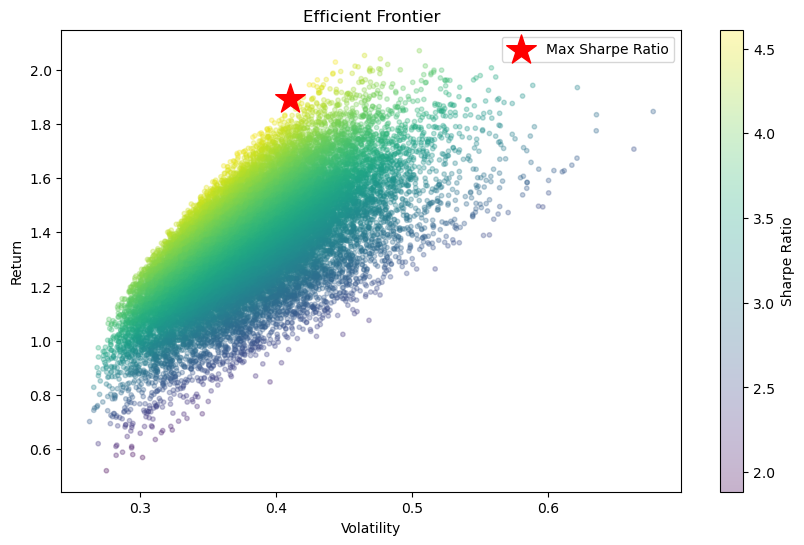

Weight of 688387.SSReturn in the portfolio with maximum Sharpe Ratio: 0.016075508764334803
Weight of 601618.SSReturn in the portfolio with maximum Sharpe Ratio: 0.046723242009529785
Weight of 688981.SSReturn in the portfolio with maximum Sharpe Ratio: 0.08919810045310975
Weight of 002855.SZReturn in the portfolio with maximum Sharpe Ratio: 0.44276770958457784
Weight of 300114.SZReturn in the portfolio with maximum Sharpe Ratio: 0.205894250821039
Weight of 300394.SZReturn in the portfolio with maximum Sharpe Ratio: 0.03473204371086855
Weight of 300308.SZReturn in the portfolio with maximum Sharpe Ratio: 0.16460914465654036


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 根据路径读取csv文件
files = ["688387.SS", "601618.SS", "688981.SS", "002855.SZ", "300114.SZ", "300394.SZ", "300308.SZ"]
path = "/Users/xiaoquanliu/Desktop/Book_DataCode/第二章/"
dataframes = {}

for file in files:
    data = pd.read_csv(path + file + '.csv')
    data['Return'] = data['Close'].pct_change()
    data = data[['Date', 'Return']]
    data.columns = ['Date', file + 'Return']
    dataframes[file] = data

# 合并日收益率
merged_return = pd.DataFrame()
for df in dataframes.values():
    if merged_return.empty:
        merged_return = df
    else:
        merged_return = pd.merge(merged_return, df, on='Date')

# 保存合并的收益率csv文档到指定路径
merged_return.to_csv('/Users/xiaoquanliu/Desktop/merged_return.csv', index=False)

# 计算平均每日收益率和协方差矩阵
mean_daily_returns = merged_return.drop('Date', axis=1).mean()
cov_matrix = merged_return.drop('Date', axis=1).cov()

# 优化投资组合
num_assets = len(merged_return.columns) - 1  # 减去 'Date' 列
num_portfolios = 25000
all_weights = np.zeros((num_portfolios, num_assets))
returns = np.zeros(num_portfolios)
volatility = np.zeros(num_portfolios)
sharpe_ratio = np.zeros(num_portfolios)

for i in range(num_portfolios):
    # 权重
    weights = np.random.random(num_assets)
    weights = weights / np.sum(weights)
    # 存储权重
    all_weights[i, :] = weights
    # 期望收益率
    returns[i] = np.sum((mean_daily_returns * weights) * 252)
    # 期望方差
    volatility[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)) * 252)
    # 夏普比率
    sharpe_ratio[i] = returns[i] / volatility[i]

# 找到最大夏普比率的投资组合
max_sr_loc = np.argmax(sharpe_ratio)
max_sr_weights = all_weights[max_sr_loc]
max_sr_return = returns[max_sr_loc]
max_sr_volatility = volatility[max_sr_loc]

# 绘制有效前沿
plt.figure(figsize=(10, 6))
plt.scatter(volatility, returns, c=sharpe_ratio, cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sr_volatility, max_sr_return, color='r', marker='*', s=500, label='Max Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend(labelspacing=0.8)
plt.show()

# 打印最大夏普比率投资组合的权重
for i, stock in enumerate(merged_return.columns[1:]): 
    print(f"Weight of {stock} in the portfolio with maximum Sharpe Ratio: {max_sr_weights[i]}")
